Import

In [ ]:
#import the necesarry libraries
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
import glob
from scipy.io import wavfile
import librosa as lb
import librosa.display
import bs4
import urllib.request
import numpy as np
%matplotlib inline

Task 1

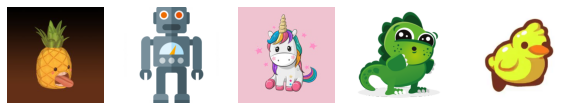

In [ ]:
#Found five URL of pictures, which I want to plot
urls = ["https://img.rl.insider.gg/itemPics/large/mr_pineapple.3ed9.jpg","https://d1nhio0ox7pgb.cloudfront.net/_img/g_collection_png/standard/256x256/robot.png","https://is1-ssl.mzstatic.com/image/thumb/Purple125/v4/de/4c/5d/de4c5d62-3616-6f33-1186-42e7e0dcd1cb/source/256x256bb.jpg","https://images.vexels.com/media/users/3/153115/isolated/lists/f426f92c54c6bf97fafa04d3d931263c-cute-baby-dino-character-cartoon.png","https://media.tenor.com/images/f1a72c65ab1407fc1cd6b3735c73ee21/tenor.png"]
#Make a figure to plot on it
fig = plt.figure()

#Read the content of the urls to an array
images = []
for i in range(len(urls)):
  urllib.request.urlretrieve(urls[i],"picture.jpg")
  images.append(np.asarray(Image.open("picture.jpg")))

#The pictures were too small, increase the size of them
fig.set_size_inches(10,10)
for i in range(len(urls)):
  #make subplot, to plot the pictures next to each other and plot them
  ax = fig.add_subplot(1, len(urls), i+1)
  plt.imshow(images[i].astype(np.uint8))
  plt.axis('off')

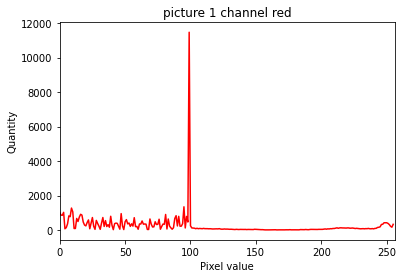

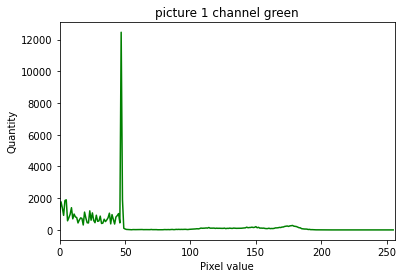

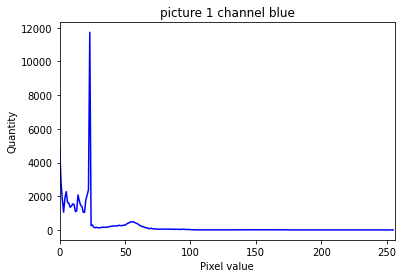

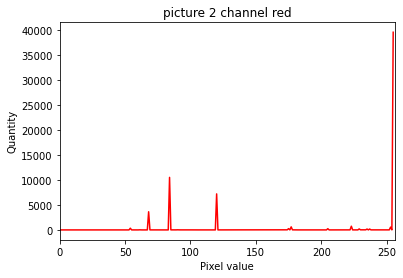

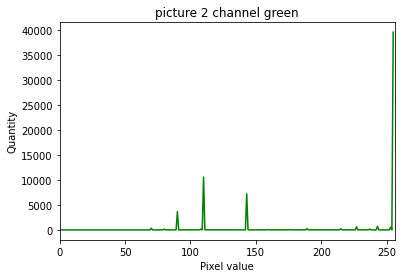

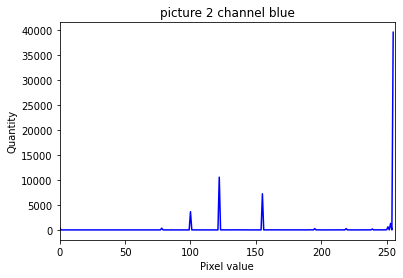

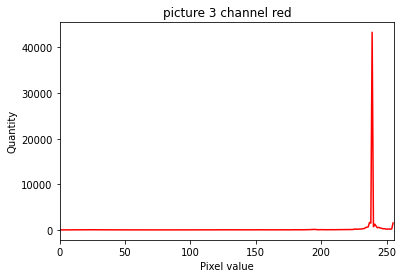

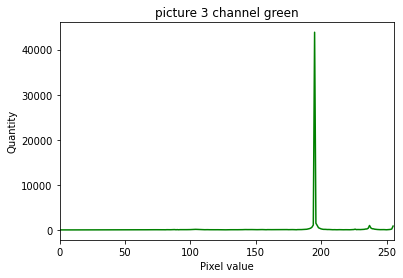

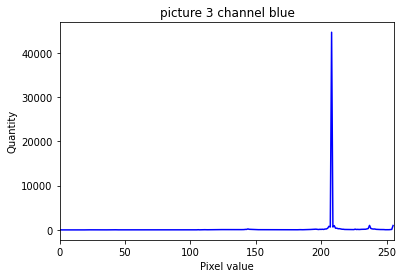

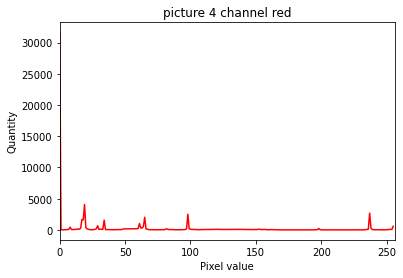

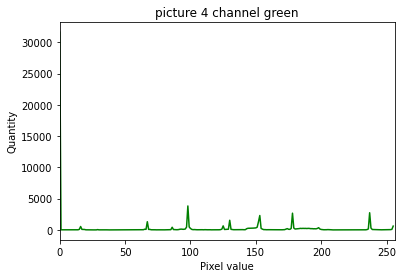

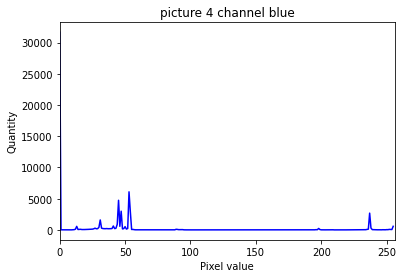

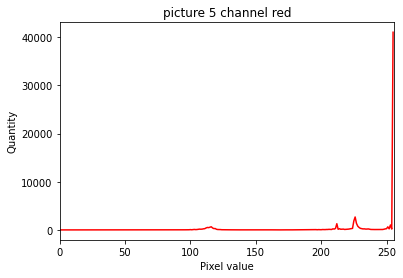

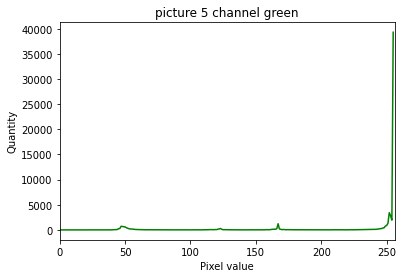

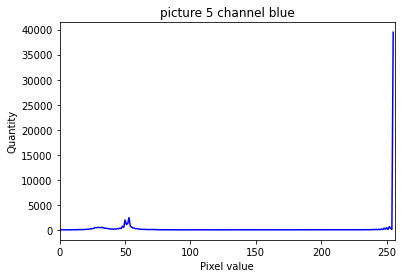

In [ ]:
fig = plt.figure()
#fig.set_size_inches(10,10)
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)
for i in range(len(urls)):
    # tuple to select colors of each channel line
    
    # create the histogram plot, with three lines, one for
    # each color
    for channel_id, c in zip(channel_ids, colors):
      #ax = fig.add_subplot(5, 3, i+1+channel_id)
      plt.xlim([0, 256])
      histogram, bin_edges = np.histogram(
          images[i][:, :, channel_id], bins=256, range=(0, 256)
      )
      plt.plot(bin_edges[0:-1], histogram, color=c)
      plt.title('picture '+str(i+1)+' channel '+c)
      plt.xlabel('Pixel value')
      plt.ylabel('Quantity')
      plt.show()

Task 2

(You can run this only after the previous blocks)

In [ ]:
#Run over all the pictures
for j in range(len(urls)):
  #
  for i in channel_ids:
    print("picture "+str(j)  +" channel "+ str(i))
    #The pixels had int type, because there is only specific values, that a pixel can have. But to make them equal a
    #zero mean, 1 std array, we need to use float values
    images[j] = images[j].astype('float64')
    #Substract the mean of the channel values, so they will be 0 mean.
    images[j][:,:,i] -= np.mean(images[j][:, :, i])
    #Divide by the std of the channel values, so they will be 1 std.
    images[j][:,:,i] /= np.std(images[j][:, :, i])
    #Check the result - round is to have real values, after the 15th digits, there is no significant content of numbers.
    #Mistake was calculated by floating number calculation
    print(round(np.mean(images[j][:, :, i]),15))
    print(round(np.std(images[j][:, :, i]),15))

picture 0 channel 0
0.0
1.0
picture 0 channel 1
-0.0
1.0
picture 0 channel 2
-0.0
1.0
picture 1 channel 0
-0.0
1.0
picture 1 channel 1
0.0
1.0
picture 1 channel 2
-0.0
1.0
picture 2 channel 0
-0.0
1.0
picture 2 channel 1
0.0
1.0
picture 2 channel 2
0.0
1.0
picture 3 channel 0
0.0
1.0
picture 3 channel 1
-0.0
1.0
picture 3 channel 2
0.0
1.0
picture 4 channel 0
-0.0
1.0
picture 4 channel 1
-0.0
1.0
picture 4 channel 2
-0.0
1.0


Task 3

In [ ]:
#Download two sound file from my google drive
!gdown --id 16_StxpLJMcgEMtj-miA6OGakUHYqp3cI
#Unzip the downloaded file
!unzip /content/Sounds.zip

Downloading...
From: https://drive.google.com/uc?id=16_StxpLJMcgEMtj-miA6OGakUHYqp3cI
To: /content/Sounds.zip
100% 97.4k/97.4k [00:00<00:00, 38.2MB/s]
Archive:  /content/Sounds.zip
  inflating: Funny-03.wav            
  inflating: Funny-04.wav            


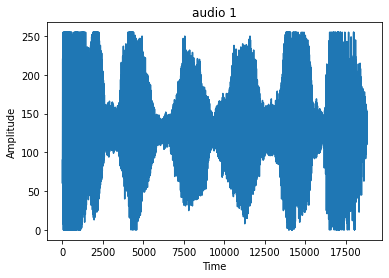

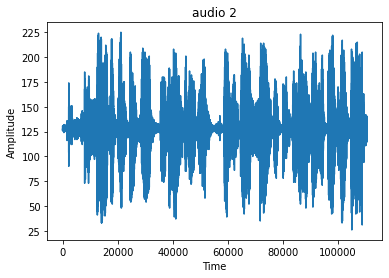

In [ ]:
#Find all wav files' name in content library
sounds = glob.glob('/content/*.wav')
#Read and plot the wav files
audio = []
for i in range(len(sounds)):
  audio.append(wavfile.read(sounds[i])[1])
  plt.plot(audio[len(audio)-1])
  plt.title('audio ' + str(i+1))
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.show()

<Figure size 432x288 with 0 Axes>

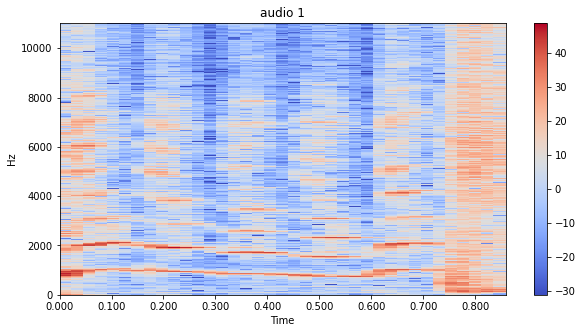

<Figure size 432x288 with 0 Axes>

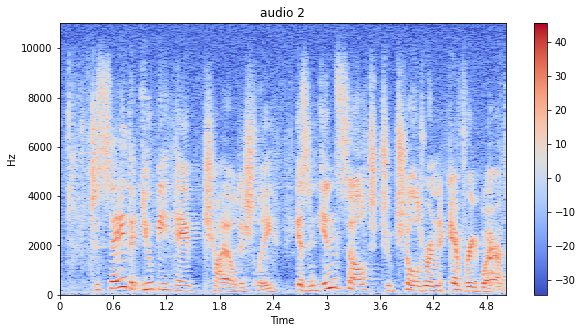

In [ ]:
# Load audio files to librosa
samples=[]

for i in range(len(sounds)):
  sample, sr = lb.load(sounds[i],sr=None)
  samples.append(sample)

# Visualize spectrogram
for i in range(len(sounds)):
  plt.figure()
  #Make a short time Fourier transformation ro be able to visualize the datas
  sgram = librosa.stft(samples[i])
  #Make spectrogram and then plot
  #The code from: https://www.kaggle.com/msripooja/steps-to-convert-audio-clip-to-spectrogram
  X = librosa.stft(samples[i])
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(10, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()
  plt.title('audio ' + str(i+1))
  plt.xlabel('Time')
  plt.ylabel('Hz')
  plt.show

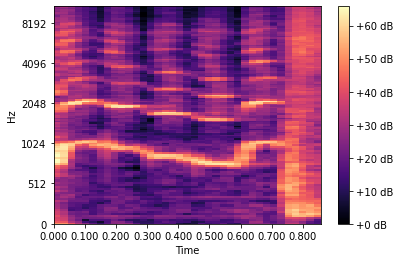

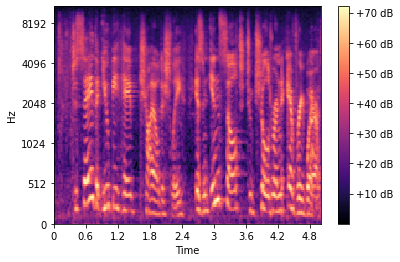

In [ ]:
#Another possiblity to plot spectograms
for i in range(2):
    plt.figure()
    sgram = librosa.stft(samples[i])
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    librosa.display.specshow(mel_sgram, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')

Task 4

In [ ]:
#The standardization of data. The code is the same as by the pictures
for i in range(len(samples)):
  print('audio '+str(i+1))
  samples[i] -= np.mean(samples[i])
  samples[i] /= np.std(samples[i])
  print(round(np.mean(samples[i]),7))
  print(round(np.std(samples[i]),7))

audio 1
-0.0
1.0
audio 2
0.0
0.9999999


Task 5

In [ ]:
#Source of the piece of code: https://stackoverflow.com/questions/30951657/download-only-the-text-from-a-webpage-content-in-python
#open the url and store the html
webpage= urllib.request.urlopen("http://smartlab.tmit.bme.hu/oktatas-deep-learning").read()
soup = bs4.BeautifulSoup(webpage, 'html.parser')
text=soup.find_all(text=True)

#Every piece of text has a catherogry. We want just the text of specific ones.
#Collect cathergories
cathegories = np.array(())
for i in range(len(text)):
  new = True
  for cat in zip(cathegories):
    if (cat[0] == text[i].parent.name):
      new = False
  if (new):
    cathegories = np.append(cathegories, text[i].parent.name)
#Write cathergories
for j in range(len(cathegories)):
  print(str(j) +": "+ str(cathegories[j]))


0: [document]
1: html
2: head
3: title
4: script
5: body
6: div
7: a
8: ul
9: li
10: button
11: span
12: h1
13: b
14: p
15: blockquote
16: em
17: h3
18: h2
19: ol
20: strong
21: address
22: br
23: i


In [ ]:
#This function can help us by get rid of the html part of the text. We don't want to have numbers or not alpha numeric
#symbols as well
def delete(t):
  back = ""
  go = True
  #get rid of the code between <> this symbols
  for char in t:
    if (char == '<'):
      go = False
    elif (char == '>'):
      go = True
    #get rid of the not alpha numeric charachters or numbers 
    if (go and char.isalnum() and ((ord(char) < ord('0')) or (ord(char) > ord('9')))):
      back += str.lower(char)
  return back
  

In [ ]:
#Piece of texts are in the following cathergories
cats = np.array([7,8,9,12,13,14,16,17,18,20,21,22,23])
#Make a line from all the caracthers
information = ""
for i in zip(cats):
  for t in zip(text):
    if (t[0].parent.name == cathegories[i]):
      information += delete(t[0])
print(information)

languagesmagyarenglishrólunklaborunkrólmunkatársainkmédiamegjelenésekmegoldásainkprofivoxmagyarnyelvűfelolvasókorpuszosprofivoxmagyarnyelvűfelolvasódnnprofivoxmagyarnyelvűfelolvasóhmmprofivoxmagyarnyelvűfelolvasódiádostriádosstrokeaidalkalmazásokjawsforwindowsintegrációidőjárásmindenkinekmagyarwindowsaalfrednyelvenwindowsrobobraillebeszélőatmekgyógyszervonalogyiárlistafelolvasótmobilekeletipályaudvarbemondórendszeremindenségelméletecfilmgépibeszédszinkronkfkutatásiprojektekfolyamatbankutatásiprojektekbefejezettpublikációkösszespublikációkkiemeltletölthetőkönyvekoktatáskapcsolatblogkezdőlapoktatástovábbitudnivalókcsatlakozomgyirestóthbálintcsapótamásgáborzainkócsabamiezeketajánljukkattidehttpstwittercomvitmavatárgyhivatalosgooglegroupsoldalánaőszikurzushivatalosmicrosoftteamscsatornájánaőszikurzushivatalosmicrosoftteamscsatornájánitttudjátokbeküldenitárgymoodleoldalaelőadásokgyakorlatokházifeladatoktárgytwittercsatornahírektárgygithuboldalagyakorlatokházifeladatokőszikurzusmsteamscsator

In [ ]:
#Collect or one carachter long letter from Hungarian language
abc = []
for i in range(ord('a'),ord('z')):
  abc.append(chr(i))
abc.append('á')
abc.append('é')
abc.append('ó')
abc.append('ö')
abc.append('ő')
abc.append('ú')
abc.append('ü')
abc.append('ű')
abc

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'á',
 'é',
 'ó',
 'ö',
 'ő',
 'ú',
 'ü',
 'ű']

a: 1260
b: 252
c: 131
d: 376
e: 1315
f: 172
g: 472
h: 233
i: 596
j: 145
k: 618
l: 918
m: 408
n: 754
o: 609
p: 205
q: 9
r: 597
s: 778
t: 998
u: 212
v: 216
w: 27
x: 20
y: 267
á: 452
é: 360
ó: 165
ö: 95
ő: 112
ú: 16
ü: 42
ű: 15


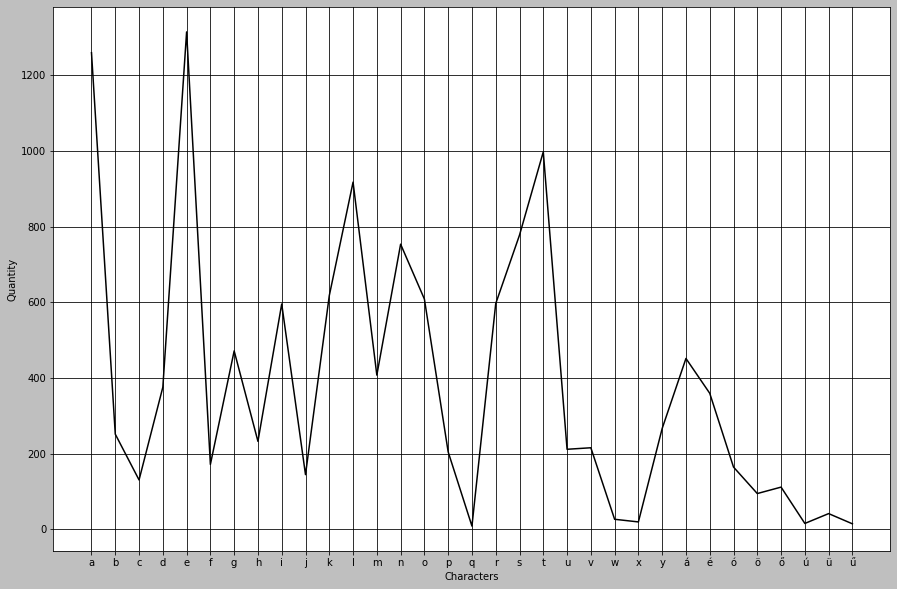

In [ ]:
numbers = []
for char in abc:
  x = 0
  for inf in information:
    if (inf == char):
      x += 1
  numbers.append(x)

for i in range(len(numbers)):
  print(abc[i] + ': '+str(numbers[i]))
plt.figure(figsize=(15,10))
plt.style.use('grayscale')
plt.plot(abc,numbers)
plt.xlabel('Characters')
plt.ylabel('Quantity')
plt.grid()
plt.show()